### 순환신경망(RNN)
- 유닛간의 연결이 순환적 구조를 갖는 신경망
- 순차데이터(샘플에 순서가 있는 데이터)를 입력 데이터로 사용
- 타임 스텝: 순차 데이터를 처리하는 각 단계
- 순환층
    - 순환 구조가 있는 층(은닉층의 출력이 다시 은닉층의 입력으로 사용)
    - 순환층의 노드를 셀(cell)이라고 함
- 활성화함수 
    - 순환층: tanh
    - 출력층: sigmoid
- LSTM(Long short term memory): RNN 모형의 일종으로 다양한 입력 시퀀스(sequence)를 받아 출력 시퀀스를 만들 수 있는 모형

In [1]:
import numpy as np
a = np.arange(0, 10, 0.5)
print(len(a), a)
data = np.sin(a)
print(data)
print(len(data))

20 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
20


In [2]:
#t-3 데이터를 이용하여 t시점의 값을 예측
timestep = 3
X, y = [], []
for i in range(timestep, len(data)):
    X.append(np.array([data[i-j] for j in range(timestep, 0, -1)]))
    y.append(data[i])

print(X)
print(y)

[array([0.        , 0.47942554, 0.84147098]), array([0.47942554, 0.84147098, 0.99749499]), array([0.84147098, 0.99749499, 0.90929743]), array([0.99749499, 0.90929743, 0.59847214]), array([0.90929743, 0.59847214, 0.14112001]), array([ 0.59847214,  0.14112001, -0.35078323]), array([ 0.14112001, -0.35078323, -0.7568025 ]), array([-0.35078323, -0.7568025 , -0.97753012]), array([-0.7568025 , -0.97753012, -0.95892427]), array([-0.97753012, -0.95892427, -0.70554033]), array([-0.95892427, -0.70554033, -0.2794155 ]), array([-0.70554033, -0.2794155 ,  0.21511999]), array([-0.2794155 ,  0.21511999,  0.6569866 ]), array([0.21511999, 0.6569866 , 0.93799998]), array([0.6569866 , 0.93799998, 0.98935825]), array([0.93799998, 0.98935825, 0.79848711]), array([0.98935825, 0.79848711, 0.41211849])]
[0.9974949866040544, 0.9092974268256817, 0.5984721441039564, 0.1411200080598672, -0.35078322768961984, -0.7568024953079282, -0.977530117665097, -0.9589242746631385, -0.7055403255703919, -0.27941549819892586, 0.

In [3]:
#신경망에 입력하기 위해 차원 변경
X, y = np.array(X).reshape(len(X), 3, 1), np.array(y).reshape(len(y), 1)
print(X.shape)
print(y.shape)

(17, 3, 1)
(17, 1)


In [4]:
#RNN모델 생성
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
np.random.seed(0)
model = Sequential()
# units: 출력노드수, input_shape: (타임스텝, 변수개수)
model.add(SimpleRNN(units=10, input_shape=(3,1))) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [5]:
from datetime import datetime  
import tensorflow as tf  
logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir

'c:/logs/20230508-160420'

In [6]:
#모델 학습
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  
hist = model.fit(X, y, epochs=1000,callbacks=[tensorboard_callback])
#anaconda prompt에서 실행
#tensorboard --logdir=c:/logs/20230508-155042

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2197
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2052
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1923
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.1791
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1675
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1575
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1487
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1410
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1341
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1279
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1225
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1176
Epoch 13/1000
1/1 [========================

In [7]:
model.evaluate(X, y)

1/1 [==============================] - 0s 243ms/step - loss: 3.7491e-04


0.0003749067254830152

1/1 [==============================] - 0s 151ms/step


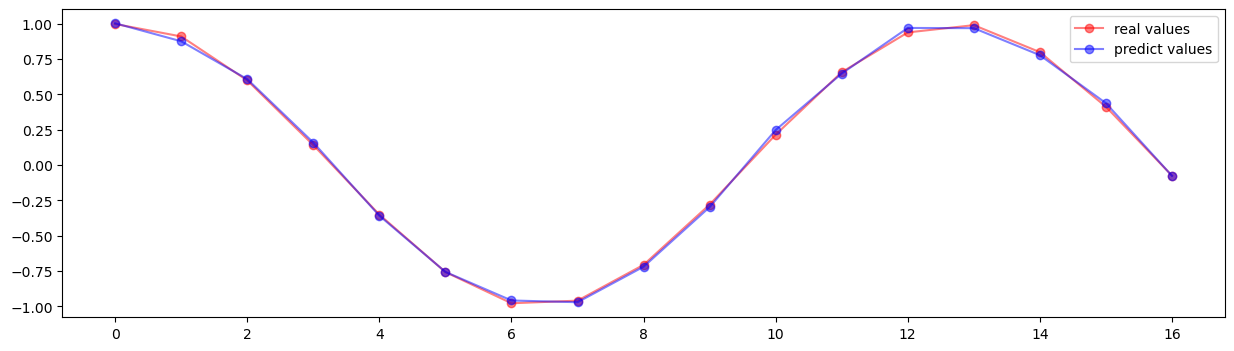

In [8]:
#시각화
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,4))
plt.plot(y, 'ro-', label='real values', alpha=0.5) # 실제값
plt.plot(model.predict(X), 'bo-', label='predict values', alpha=0.5) # 예측값
plt.legend()
plt.show()

In [9]:
#t-5 데이터를 이용하여 t시점의 값을 예측
timestep = 5
X, y = [], []
for i in range(timestep, len(data)):
    X.append(np.array([data[i-j] for j in range(timestep, 0, -1)]))
    y.append(data[i])

print(X)
print(y)

[array([0.        , 0.47942554, 0.84147098, 0.99749499, 0.90929743]), array([0.47942554, 0.84147098, 0.99749499, 0.90929743, 0.59847214]), array([0.84147098, 0.99749499, 0.90929743, 0.59847214, 0.14112001]), array([ 0.99749499,  0.90929743,  0.59847214,  0.14112001, -0.35078323]), array([ 0.90929743,  0.59847214,  0.14112001, -0.35078323, -0.7568025 ]), array([ 0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012]), array([ 0.14112001, -0.35078323, -0.7568025 , -0.97753012, -0.95892427]), array([-0.35078323, -0.7568025 , -0.97753012, -0.95892427, -0.70554033]), array([-0.7568025 , -0.97753012, -0.95892427, -0.70554033, -0.2794155 ]), array([-0.97753012, -0.95892427, -0.70554033, -0.2794155 ,  0.21511999]), array([-0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ]), array([-0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ,  0.93799998]), array([-0.2794155 ,  0.21511999,  0.6569866 ,  0.93799998,  0.98935825]), array([0.21511999, 0.6569866 , 0.93799998, 0.9893582

In [10]:
#신경망에 입력하기 위해 차원 변경
X, y = np.array(X).reshape(len(X), 5, 1), np.array(y).reshape(len(y), 1)
print(X.shape)
print(y.shape)

(15, 5, 1)
(15, 1)


In [11]:
#LSTM을 이용한 모델 생성
from keras.layers import LSTM
np.random.seed(0)
model = Sequential()
model.add(LSTM(units=10, input_shape=(5,1))) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [12]:
#모델 학습
hist = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.4350
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4326
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4303
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4279
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4257
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4237
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4216
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4197
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4181
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4167
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4153
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4142
Epoch 13/1000
1/1 [==============================]

In [13]:
model.evaluate(X, y)

1/1 [==============================] - 0s 438ms/step - loss: 0.0013


0.0013031241251155734

1/1 [==============================] - 0s 313ms/step


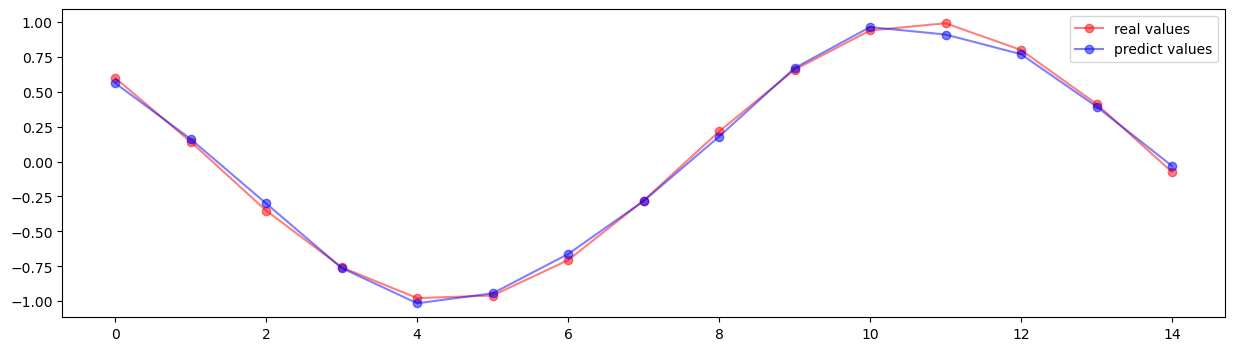

In [14]:
#시각화
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,4))
plt.plot(y, 'ro-', label='real values', alpha=0.5) # 실제값
plt.plot(model.predict(X), 'bo-', label='predict values', alpha=0.5) # 예측값
plt.legend()
plt.show()